<a href="https://colab.research.google.com/github/cweikucf/cap4630/blob/master/HW_3/ConnerWeik_CAP4630_Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conner Weik
# CAP 4630, Spring 2020
# Homework 3

If something doesn't work, please try doing run all or let me know. Thanks!

# Imports and stuff

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Problem 1

## The function get_random_data

In [0]:
# Get random data. Returns a dictionary containing the data and labels arrays.
def get_random_data(w, b, mu, sigma, m):
  # Create the arrays.
  data = np.zeros( (m, 2) )
  labels = np.zeros( (m, ) )

  c = 2 * np.random.default_rng().uniform(0, 1, m)
  c = c.astype(int)
  x_1 = np.random.default_rng().uniform(0, 1, m)
  n = np.random.default_rng().normal(mu, sigma, m)
  x_2 = w * x_1 + b + (-1) ** c * n

  data[:,0] = x_1
  data[:,1] = x_2
  labels = c

  return {'data' : data, 'labels': labels}

## The function display_random_data

In [0]:
def display_random_data(data, labels, title=''):
  m = data.shape[0]
  x_1 = data[0:m, 0]
  x_2 = data[0:m, 1]
  sizes = np.full( (m, ), 20)
  fig = plt.figure( figsize=(12, 8))
  class_0 = (labels == 0)
  class_1 = (labels == 1)
  x_1_class_0 = x_1[class_0]
  x_2_class_0 = x_2[class_0]
  sizes_class_0 = sizes[class_0]
  x_1_class_1 = x_1[class_1]
  x_2_class_1 = x_2[class_1]
  sizes_class_1 = sizes[class_1]
  plt.scatter(x_1_class_0, x_2_class_0, color="blue", s=sizes_class_0,label="Class 0")
  plt.scatter(x_1_class_1, x_2_class_1, color="red", s=sizes_class_1,label="Class 1")
  plt.legend(loc='upper left')
  plt.title(title, fontdict={'fontsize': 20})
  plt.show()

## Displays of random data

Split data into a training set and test set and display data for each. For each of these, the training set will be displayed above the test set.

Training set 1 and test set 1

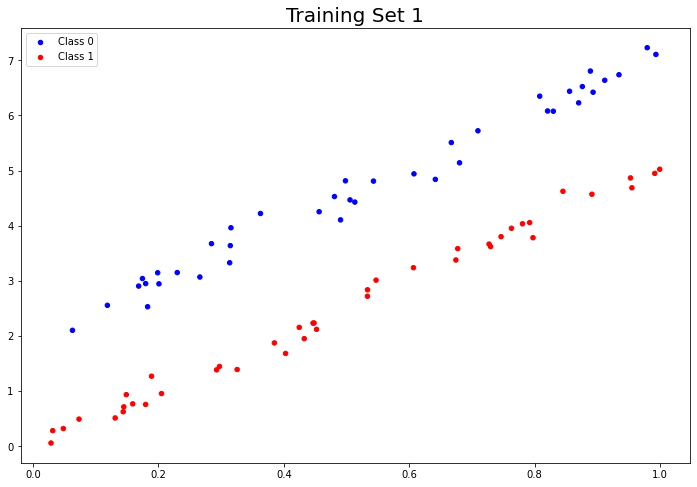

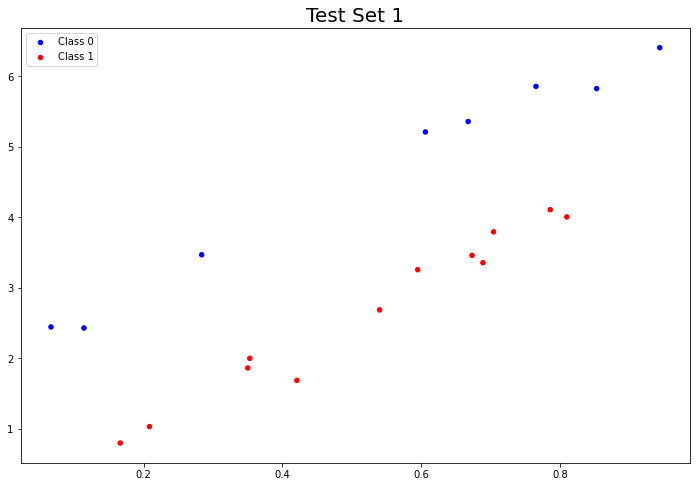

In [4]:
m = 100
split_index = int(0.8 * m)
random_data = get_random_data(5, 1, 1, 0.2, m)
display_random_data(random_data['data'][:split_index], random_data['labels'][:split_index], title='Training Set 1')
display_random_data(random_data['data'][split_index:], random_data['labels'][split_index:], title='Test Set 1')

Training set 2 and test set 2

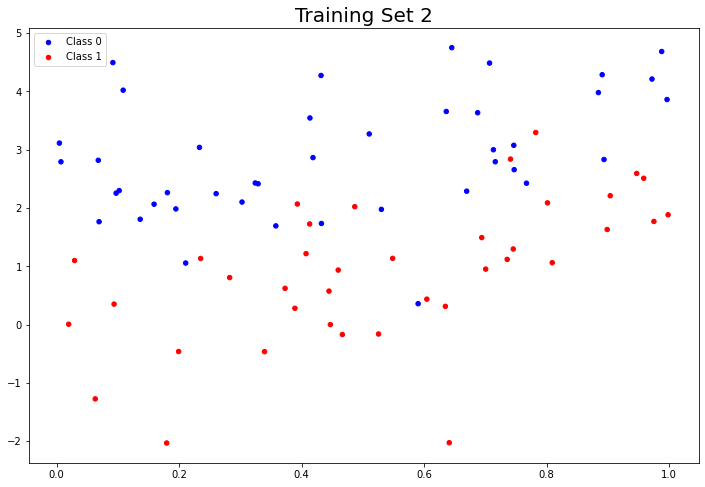

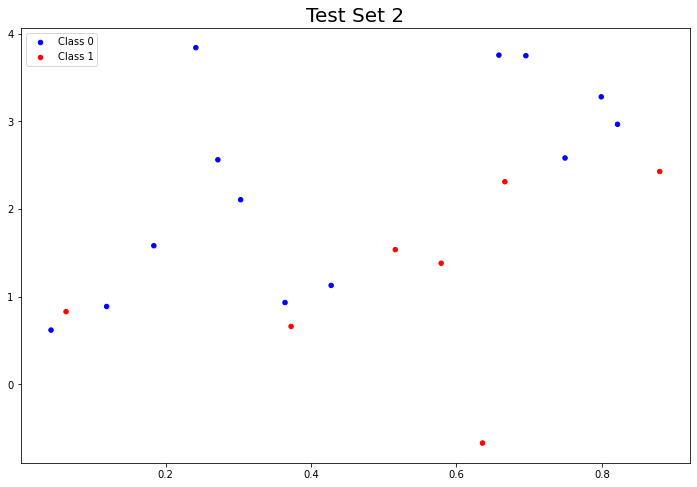

In [5]:
m = 100
split_index = int(0.8 * m)
random_data = get_random_data(2, 1, 1, 1, m)
display_random_data(random_data['data'][:split_index], random_data['labels'][:split_index], title='Training Set 2')
display_random_data(random_data['data'][split_index:], random_data['labels'][split_index:], title='Test Set 2')

Training set 3 and test set 3

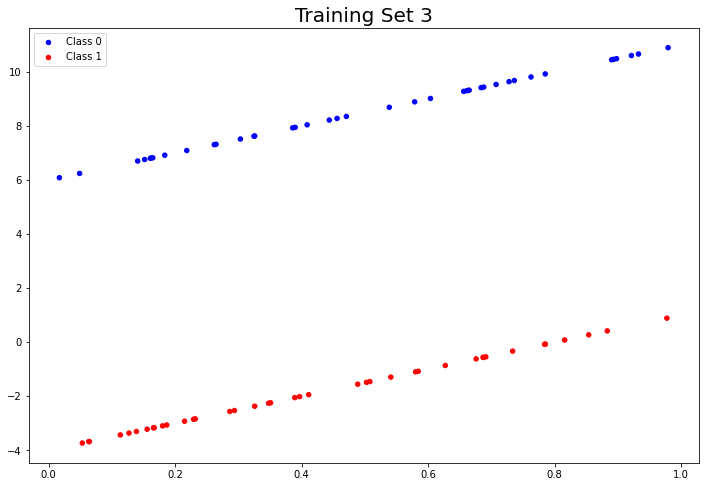

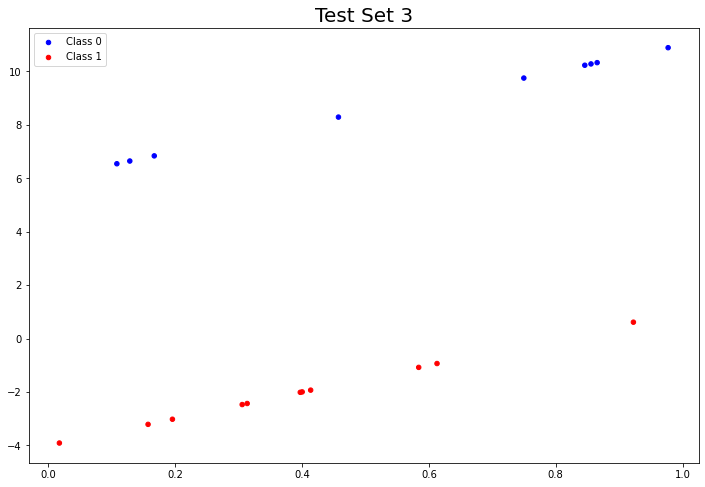

In [6]:
m = 100
split_index = int(0.8 * m)
random_data = get_random_data(5, 1, 5, 0, m)
display_random_data(random_data['data'][:split_index], random_data['labels'][:split_index], title='Training Set 3')
display_random_data(random_data['data'][split_index:], random_data['labels'][split_index:], title='Test Set 3')

# Problem 2



## The data that will be used

Generate and display random data for training and test set. The training set is the upper of the two displayed sets and the test set is the lower.

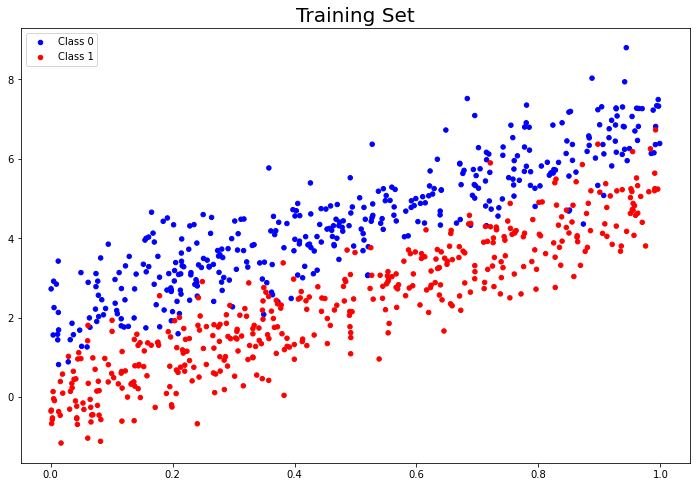

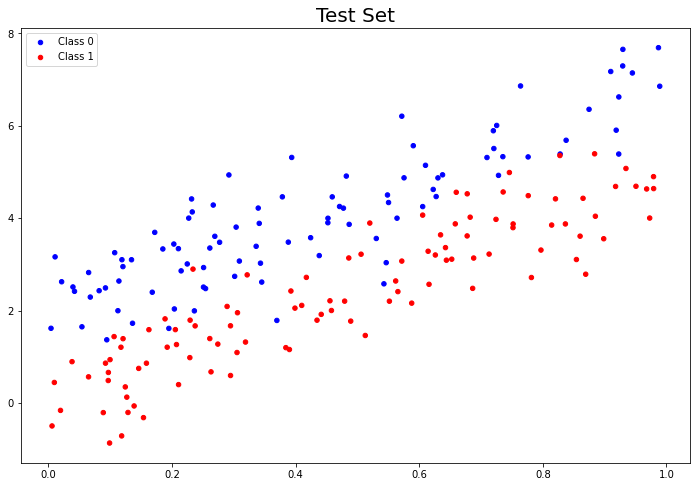

In [7]:
m = 1000
split_index = int(0.8 * m)
w = 5
b = 1
mu = 1
sigma = 0.7
random_data = get_random_data(w, b, mu, sigma, m)

train_data = random_data['data'][:split_index]
train_labels = random_data['labels'][:split_index]

test_data = random_data['data'][split_index:]
test_labels = random_data['labels'][split_index:]

display_random_data(train_data, train_labels, title='Training Set')
display_random_data(test_data, test_labels, title='Test Set')

## Make, compile, and train the model

In [8]:
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

model = Sequential()
opt = tf.keras.optimizers.RMSprop(lr=0.01)

model.add(Dense(1, activation='sigmoid', name='DenseOutput', input_dim=2))
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 9ms/step - loss: 0.9180 - accuracy: 0.5500 - val_loss: 0.7448 - val_accuracy: 0.5550
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6390 - accuracy: 0.6200 - val_loss: 0.5872 - val_accuracy: 0.6650
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5546 - accuracy: 0.7588 - val_loss: 0.5549 - val_accuracy: 0.7700
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.8062 - val_loss: 0.5355 - val_accuracy: 0.7800
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.8263 - val_loss: 0.5178 - val_accuracy: 0.7900
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.8200 - val_loss: 0.5026 - val_accuracy: 0.8150
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.8338 - val_loss: 0.4887 - val_accuracy: 0.8100
Epoch 8/100
2

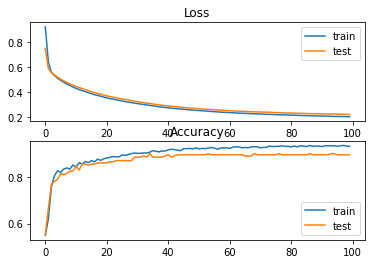

In [9]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.show()

## Obtaining the separating line

The bounding line corresponds to the decision boundary. The sigmoid function's decision boundary is 0.5, which is the value achieved when the input to the sigmoid function is 0.
The input to the sigmoid function is our model's predicted value for some $x_1$ and $x_2$, that is, $\hat{y} = w_1x_1 + w_2x_2 + b$.

We will solve $w_1x_1 + w_2x_2 + b = 0$ in terms of $x_2$.

$w_1x_1 + w_2x_2 + b = 0$

$w_2x_2 = -w_1x_1 - b$

$x_2 = -\frac{w_1}{w_2}x_1 - \frac{b}{w_2}$

We get $x_2 = -\frac{w_1}{w_2}x_1 - \frac{b}{w_2}$.

The true line used to generate the data is $w_2 = wx_1 + b$, where $w$ and $b$ in this equation are the w and b that are input for the get_random_data function, respectively.

For this, the true line was $x_2 = 5x_1 + 1$, and the model's line is shown below.

In [10]:
dense_layer = model.get_layer(name='DenseOutput')
weights = dense_layer.get_weights()[0][:,0]
bias = dense_layer.get_weights()[1][0]
coefficient1 = - (weights[0] / weights[1])
coefficient2 = - (bias / weights[1])
print("The line that the model predicts is x_2 = {0}x_1 + {1}".format(coefficient1, coefficient2))

The line that the model predicts is x_2 = 4.726992607116699x_1 + 1.127295970916748


## Plot results

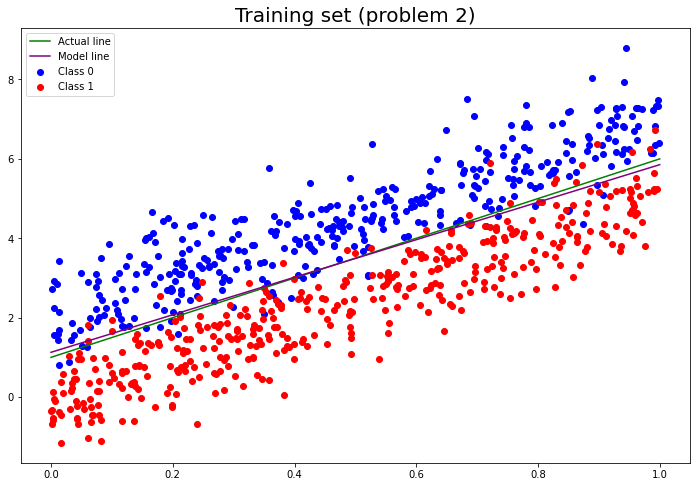

In [11]:
# Training set
fig = plt.figure(figsize=(12, 8))

x_1_line = np.linspace(0, 1, 1000)
x_2_actual = w * x_1_line + b
x_2_model = coefficient1 * x_1_line + coefficient2
plt.plot(x_1_line, x_2_actual, color='green', label="Actual line")
plt.plot(x_1_line, x_2_model, color='purple', label="Model line")

class_0 = (train_labels == 0)
class_1 = (train_labels == 1)
plt.scatter(train_data[class_0][:,0], train_data[class_0][:,1], color='blue', label='Class 0')
plt.scatter(train_data[class_1][:,0], train_data[class_1][:,1], color='red', label='Class 1')

plt.legend(loc="upper left")
plt.title("Training set (problem 2)", fontdict={'fontsize': 20})
plt.show()

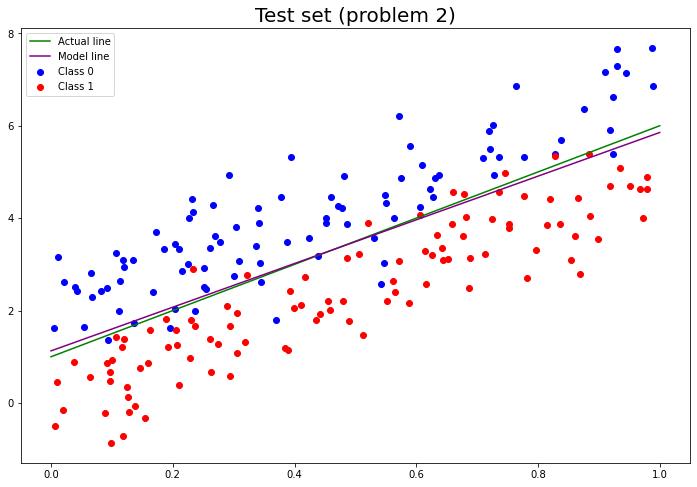

In [12]:
# Test set
fig = plt.figure(figsize=(12, 8))

x_1_line = np.linspace(0, 1, 1000)
x_2_actual = w * x_1_line + b
x_2_model = coefficient1 * x_1_line + coefficient2
plt.plot(x_1_line, x_2_actual, color='green', label="Actual line")
plt.plot(x_1_line, x_2_model, color='purple', label="Model line")

class_0 = (test_labels == 0)
class_1 = (test_labels == 1)
plt.scatter(test_data[class_0][:,0], test_data[class_0][:,1], color='blue', label='Class 0')
plt.scatter(test_data[class_1][:,0], test_data[class_1][:,1], color='red', label='Class 1')

plt.legend(loc="upper left")
plt.title("Test set (problem 2)", fontdict={'fontsize': 20})
plt.show()

## Heatmap

For the heatmap, I will take $(x_1, x_2)$ pairs on $[0, 1] \times [0, 10]$.

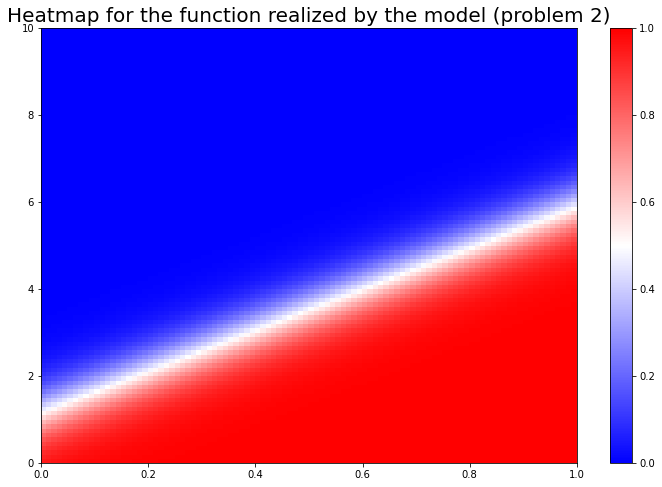

In [13]:
# https://stackoverflow.com/questions/11144513/cartesian-product-of-x-and-y-array-points-into-single-array-of-2d-points
# https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib/54088910#54088910

heatmap_x_1 = np.linspace(0, 1, 101)
heatmap_x_2 = np.linspace(0, 10, 101)

heatmap_grid = np.transpose([np.tile(heatmap_x_1, len(heatmap_x_2)), np.repeat(heatmap_x_2, len(heatmap_x_1))])
results = model.predict(heatmap_grid).reshape(101, 101)
heatmap_grid = heatmap_grid.reshape((101, 101, 2))
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()
c = ax.pcolormesh(heatmap_x_1, heatmap_x_2, results, cmap='bwr', vmin=0, vmax=1)
fig.colorbar(c, ax=ax)
plt.title('Heatmap for the function realized by the model (problem 2)', fontdict={'fontsize': 20})
plt.show()

# Problem 3

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/

The input data for this will be the same as in Problem 2.

## Display the data again (optional)

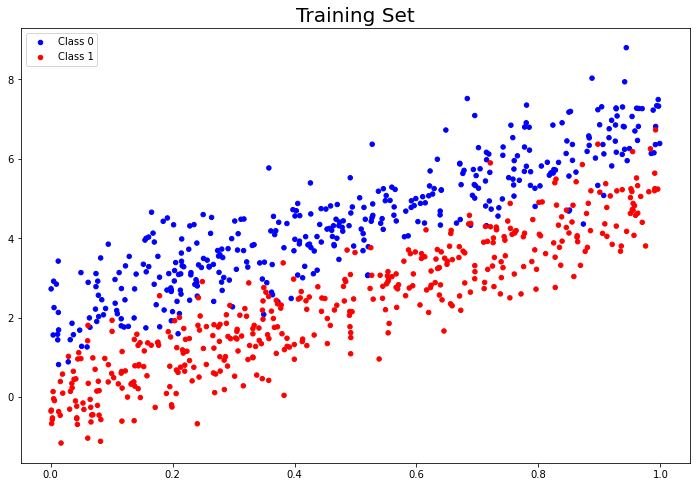

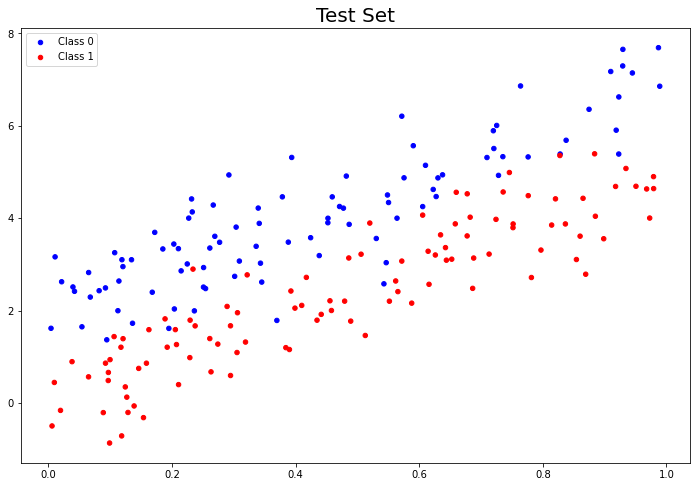

In [14]:
display_random_data(train_data, train_labels, title='Training Set')
display_random_data(test_data, test_labels, title='Test Set')

## ${}$

The activation that will be used is the sigmoid function.

In [0]:
# Sigmoid activation function.
def sigmoid(x):
  return 1.0 / (1 + np.exp(-x))

The prediction for some $x_1$ and $x_2$, before sigmoid, is $\hat{y} = w_1x_1 + w_2x_2 + b$. Sigmoid is then applied to this result.

In [0]:
def predict(w, x):
  return sigmoid((w[0] * x[0]) + (w[1] * x[1]) + w[2])

In [0]:
# Determine the class of a prediction.
def get_class(x):
  return 1 if x >= 0.5 else 0

The loss function is binary cross entropy. $L_{ce} = -y\log a - (1-y)\log(1-a)$, where $y$ is the true label (class) and $a$ is the prediction.
The true label can only be 0 or 1.
If it is 0, $L_{ce} = -\log(1-a)$.
If it is 1, $L_{ce} = -\log{a}$.


In [0]:
def loss(a, y):
  return -np.log(1.0 - a) if y == 0 else -np.log(a)

As in the pdf https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf, the partial derivative of the loss function with respect to some weight $w_j$ is $(a-y) \cdot x_j$ and the partial derivative of the loss function with respect to the bias term $b$ is $a - y$.

## Perform stochastic gradient descent

In [0]:
# https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/

# Initialize weights.
w = np.zeros(3)

lr = 0.1
epochs = 20

# Go through every epoch.
for epoch in range(epochs):
  # Go through every sample from the training set.
  for i in np.arange(len(train_data)):
    x = train_data[i]
    y = train_labels[i]
    a = predict(w, train_data[i])
    # Update weights.
    w[0] += lr * (y - a) * a * (1 - a) * x[0]
    w[1] += lr * (y - a) * a * (1 - a) * x[1]
    w[2] += lr * (y - a) * a * (1 - a)

## Results

w now contains the coefficient of $x_1$, the coefficient of $x_2$, and $b$ in $w_1x_1 + w_2x_2 + b = 0$.

Like before, we get the bounding line, solved for $x_2$.

$x_2 = -\frac{w_1}{w_2}x_1 - \frac{b}{w_2}$.

The code block below tells what the bounding line is.

In [20]:
coefficient1 = -(w[0] / w[1])
coefficient2 = -(w[2] / w[1])
print("The bounding line for the model is x_2 = {0}x_1 + {1}".format(coefficient1, coefficient2))

The bounding line for the model is x_2 = 4.480175872229305x_1 + 1.2020845695038143


## Binary cross entropy loss and accuracy on the test set

In [21]:
loss_sum = 0.0
for i in range(len(test_data)):
  a = predict(w, test_data[i])
  loss_sum += loss(a, test_labels[i])
loss_mean = loss_sum / len(test_data)
print('The mean binary cross entropy loss for the test set is {0}'.format(loss_mean))

count_accurate = 0
for i in range(len(test_data)):
  a = predict(w, test_data[i])
  predicted_class = get_class(a)
  if predicted_class == test_labels[i]:
    count_accurate += 1

print('The accuracy on the test set is {0}'.format((1.0 * count_accurate) / len(test_data)))

The mean binary cross entropy loss for the test set is 0.27962090511483867
The accuracy on the test set is 0.9


## Plots

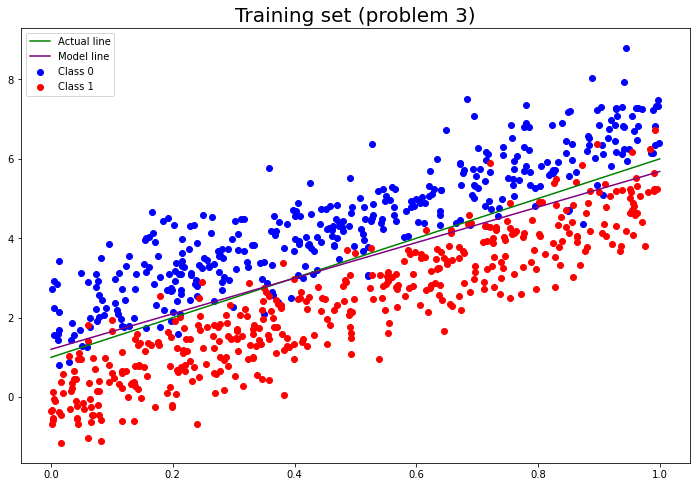

In [22]:
# Training set
fig = plt.figure(figsize=(12, 8))

# The values of w and b in the original data were 5 and 1, respectively.
w_param = 5
b_param = 1

x_1_line = np.linspace(0, 1, 1000)
x_2_actual = w_param * x_1_line + b_param
x_2_model = coefficient1 * x_1_line + coefficient2
plt.plot(x_1_line, x_2_actual, color='green', label="Actual line")
plt.plot(x_1_line, x_2_model, color='purple', label="Model line")

class_0 = (train_labels == 0)
class_1 = (train_labels == 1)
plt.scatter(train_data[class_0][:,0], train_data[class_0][:,1], color='blue', label='Class 0')
plt.scatter(train_data[class_1][:,0], train_data[class_1][:,1], color='red', label='Class 1')

plt.legend(loc="upper left")
plt.title("Training set (problem 3)", fontdict={'fontsize': 20})
plt.show()

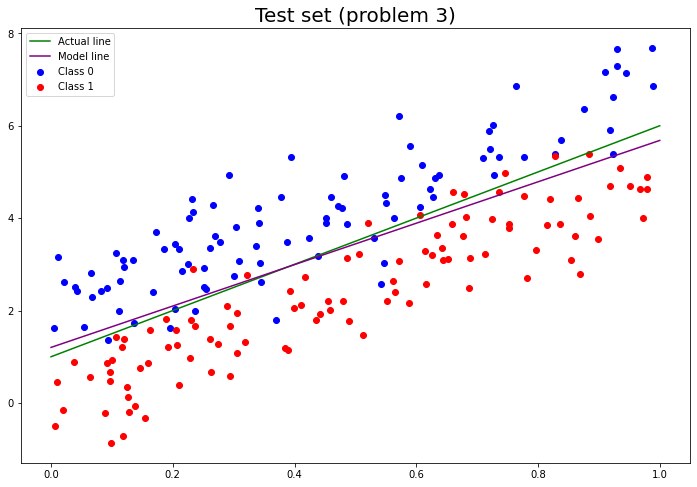

In [23]:
# Test set
fig = plt.figure(figsize=(12, 8))

# The values of w and b in the original data were 5 and 1, respectively.
w_param = 5
b_param = 1

x_1_line = np.linspace(0, 1, 1000)
x_2_actual = w_param * x_1_line + b_param
x_2_model = coefficient1 * x_1_line + coefficient2
plt.plot(x_1_line, x_2_actual, color='green', label="Actual line")
plt.plot(x_1_line, x_2_model, color='purple', label="Model line")

class_0 = (test_labels == 0)
class_1 = (test_labels == 1)
plt.scatter(test_data[class_0][:,0], test_data[class_0][:,1], color='blue', label='Class 0')
plt.scatter(test_data[class_1][:,0], test_data[class_1][:,1], color='red', label='Class 1')

plt.legend(loc="upper left")
plt.title("Test set (problem 3)", fontdict={'fontsize': 20})
plt.show()

## Heatmap

The heatmap will be done similarly to before. I will take $(x_1, x_2)$ pairs on $[0, 1] \times [0, 10]$.

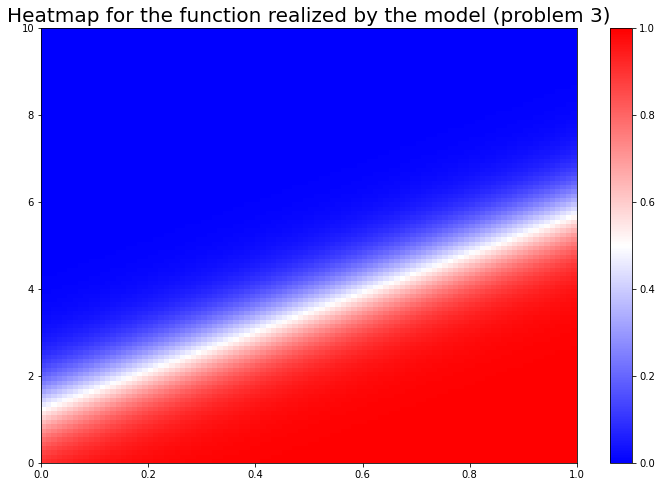

In [24]:
# https://stackoverflow.com/questions/11144513/cartesian-product-of-x-and-y-array-points-into-single-array-of-2d-points
# https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib/54088910#54088910

length = 101
heatmap_x_1 = np.linspace(0, 1, length)
heatmap_x_2 = np.linspace(0, 10, length)

heatmap_grid = np.transpose([np.tile(heatmap_x_1, length), np.repeat(heatmap_x_2, length)])
results = np.zeros((length, length))
for i in range(length):
  for j in range(length):
    results[j][i] = predict(w, np.array([heatmap_x_1[i], heatmap_x_2[j]]))
heatmap_grid = heatmap_grid.reshape((length, length, 2))
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()
c = ax.pcolormesh(heatmap_x_1, heatmap_x_2, results, cmap='bwr', vmin=0, vmax=1)
fig.colorbar(c, ax=ax)
plt.title('Heatmap for the function realized by the model (problem 3)', fontdict={'fontsize': 20})
plt.show()

# Sources / Links

https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

https://stackoverflow.com/questions/29702424/how-to-get-matplotlib-figure-size

https://colab.research.google.com/drive/1pOFL4Qm6WOn2Nxxy6_HteEqQMxStTwzs

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

https://colab.research.google.com/drive/1hUc_4HTtPQ2Xq0XXnokV4uoK84zmmvQR

https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible

https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generated/numpy.random.Generator.normal.html

https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generated/numpy.random.Generator.uniform.html

https://riptutorial.com/matplotlib/example/17254/heatmap

https://colab.research.google.com/drive/1hUc_4HTtPQ2Xq0XXnokV4uoK84zmmvQR

https://mc.ai/simple-binary-classification-with-keras/

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib/54088910#54088910

https://stackoverflow.com/questions/11144513/cartesian-product-of-x-and-y-array-points-into-single-array-of-2d-points

https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf

https://colab.research.google.com/drive/1ZKa5sIiSgS8P1RuNyH6yYcZ6F9S7Yiwu

https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-

https://github.com/perborgen/LogisticRegression/blob/master/logistic.py

https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/